In [823]:
import os 
import cv2
import numpy as np

import matplotlib.pyplot as plt

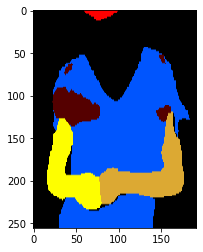

In [824]:
path_cloth = 'Documents/X/PSC/Test/cloth.jpg'

path_parse = 'Documents/X/PSC/Test/image.png'

cloth_img = np.array(cv2.imread(path_cloth))

parse_img = np.array(cv2.imread(path_parse))

parse_img = parse_img[40:256][15:180]

parse_img = cv2.resize(parse_img , (192,256))

plt.imshow(parse_img)


code_shirt = [0, 85, 254]
code_gauche = [254, 254 , 0]
code_droit = [220 , 169 , 51]
code_blanc = [255, 255, 255]
code_noir = np.array([0 , 0 , 0])

In [825]:
def equals(t,q):
    return (t==q).all()

In [826]:
def get_index_i(image):
    imin = image.shape[0]-1
    jmil = int(image.shape[1]/2)
    
    while not ((image[imin][jmil] == code_shirt).all()):
        imin-=1
    
    jmin = image.shape[1]-1
    iref = int(image.shape[0]/2)
    
    while not ((image[iref][jmin] == code_shirt).all()):
        jmin-=1
        
    jmax = 0
    
    while not ((image[iref][jmax] == code_shirt).all()): 
        jmax+=1
        
    return imin , jmin , jmax
    
    
    

In [827]:
print(get_index_i(parse_img))

(255, 170, 25)


In [828]:
def get_index_c(cloth):
    imin = cloth.shape[0]-1
    jmil = int(cloth.shape[1]/2)
    
    while ((cloth[imin][jmil] == code_blanc).all()):
        imin-=1
    
    jmin = cloth.shape[1]-1
    iref = imin - 10
    
    while ((cloth[iref][jmin] == code_blanc).all()):
        jmin-=1
        
    jmax = 0
    
    while ((cloth[iref][jmax] == code_blanc).all()): 
        jmax+=1
        
    return imin , jmin , jmax
    

In [829]:
print(get_index_c(cloth_img))

(210, 160, 31)


In [830]:
def get_scale(image, cloth):
    jmin_i , jmax_i = get_index_i(image)[1:]
    jmin_c , jmax_c = get_index_c(cloth)[1:]
    
    return (jmax_i-jmin_i)/(jmax_c-jmin_c)

In [831]:
def get_value_naive(img, x, y) : 
    (n,m,p) = img.shape
    if (int(x) < 0 or int(x) >= n or int(y) < 0 or int(y) >= m):
        return 0
    return img[int(x), int(y)]

In [832]:
def rescale_naive(image, cloth) : 
    scale = get_scale(image,cloth)
    h_new = int(256/scale)
    w_new = int(192/scale)
    p = 3
    copy = np.ndarray((h_new,w_new,p))
    for i in range(h_new):
        for j in range(w_new): 
            copy[i,j] = get_value_naive(image,i*scale,j*scale)
    return copy

In [833]:
#img = rescale_naive(parse_img , cloth_img)
#plt.imshow(img)

In [834]:
def translation(image, cloth):
    rescaled = rescale_naive(image,cloth)
    copy = np.ndarray((256,192,3))
    h_new, w_new, p = rescaled.shape
    imin_r , jmin_r = get_index_i(rescaled)[:2]
    imin_c , jmin_c = get_index_c(cloth)[:2]
    diff_i = imin_r - imin_c
    diff_j = jmin_r - jmin_c
    for i in range(256-diff_i):
        for j in range(192-diff_j): 
            copy[i][j] = rescaled[i+diff_i][j+diff_j]
    return (copy)

In [835]:
#res = translation(parse_img , cloth_img)
#plt.imshow(res)

In [836]:
def blank(image , cloth):
    imin_i , jmin_i, jmax_i = get_index_i(image)
    imin_c , jmin_c , jmax_c = get_index_c(cloth)
    
    idiff = imin_i - imin_c
    jdiff = jmin_i - jmin_c
    
    print("idiff" , idiff)
    print("jdiff" , jdiff)
    
    for i in range(256-abs(idiff)):
        for j in range(192-abs(jdiff)):
            if ((image[i][j] == code_gauche).all() or (image[i][j] == code_droit).all()):
                cloth[i-idiff][j+jdiff] = code_blanc
                

In [837]:
blank(parse_img , cloth_img)

idiff 45
jdiff 10


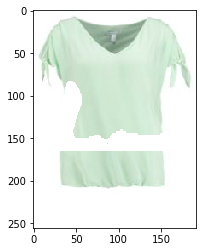

In [838]:
plt.imshow(cloth_img)